In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [111]:
import warnings 
warnings.filterwarnings("ignore")

In [67]:
df = pd.read_csv("customer_churn_data.csv")

In [68]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [70]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [71]:
df["InternetService"]

0      Fiber Optic
1      Fiber Optic
2      Fiber Optic
3              DSL
4              NaN
          ...     
995    Fiber Optic
996            NaN
997    Fiber Optic
998            NaN
999            NaN
Name: InternetService, Length: 1000, dtype: object

In [72]:
df["InternetService"] = df["InternetService"].fillna(" ")

In [73]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [74]:
df.duplicated().sum()

np.int64(0)

In [75]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [76]:
numeric_columns_data = df.select_dtypes(include=["number"])

In [77]:
numeric_columns_data

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [78]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [79]:
df["Churn"].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

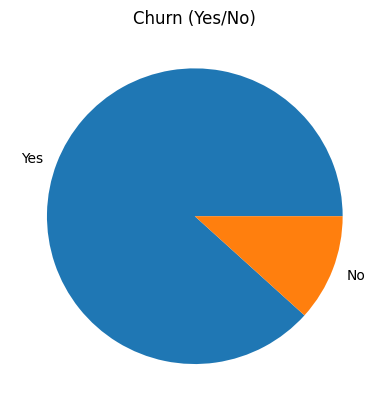

In [80]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

In [81]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [82]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [83]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [84]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [85]:
df.groupby("ContractType")["MonthlyCharges"].mean()

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

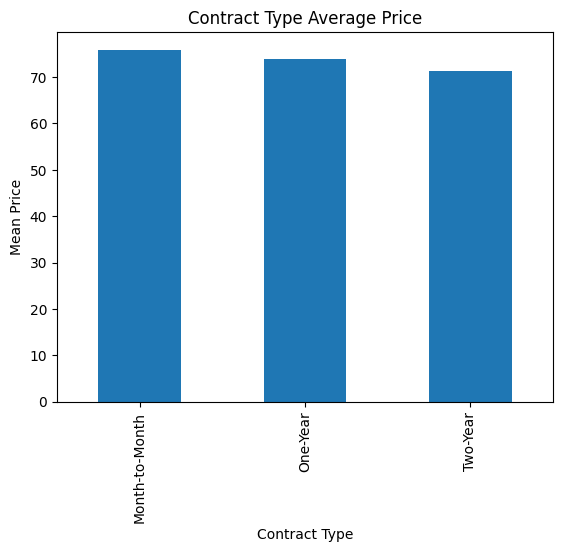

In [86]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract Type Average Price")
plt.show()

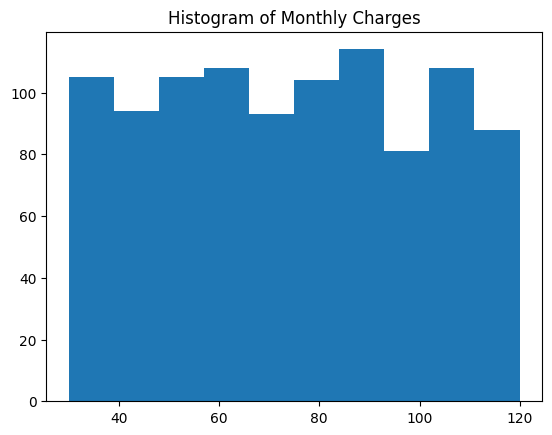

In [87]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.show()

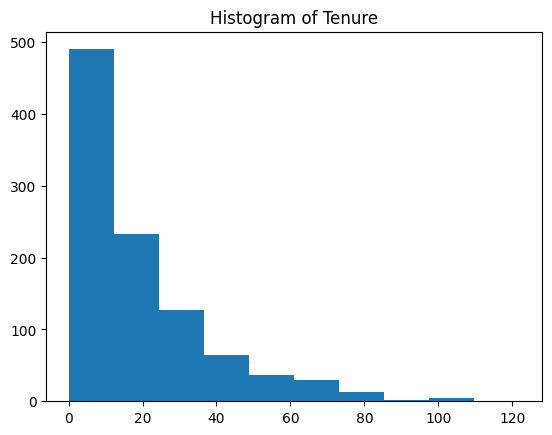

In [88]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

In [89]:
y=df[["Churn"]]
x=df[["Age","Gender","Tenure","MonthlyCharges"]]

In [90]:
y.head(3)

,Churn
0,Yes
1,Yes
2,Yes


In [91]:
x.head(3)

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79


In [112]:
x["Gender"]= x["Gender"].apply(lambda x:1 if x == "Female" else 0)

In [93]:
x.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [113]:
y["Churn"] = y["Churn"].apply(lambda x:1 if x == "Yes" else 0)

In [95]:
y.head(3)

,Churn
0,1
1,1
2,1


In [96]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [97]:
x_train

,Age,Gender,Tenure,MonthlyCharges
407,43,1,0,106.33
671,24,0,16,33.62
815,30,0,5,75.03
981,49,1,13,60.43
615,46,1,0,54.48
...,...,...,...,...
935,39,0,18,80.08
992,42,1,46,61.09
185,52,0,41,81.53
922,46,1,25,92.04


In [98]:
x_test.value_counts()

Age  Gender  Tenure  MonthlyCharges
21   0       5       69.05             1
24   0       16      43.43             1
25   1       9       107.22            1
             23      47.55             1
26   0       5       62.63             1
                                      ..
63   1       8       87.69             1
             10      90.81             1
65   1       13      64.99             1
67   1       4       50.82             1
72   1       40      102.25            1
Name: count, Length: 200, dtype: int64

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [101]:
x_train = scaler.fit_transform(x_train)

In [102]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [103]:
x_test = scaler.fit_transform(x_test)

In [119]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("accuracy score on model is {}".format(accuracy_score(y_test,predictions)))

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
log_model = LogisticRegression()

In [114]:
log_model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [115]:
y_pred = log_model.predict(x_test)

In [120]:
modelperformance(y_pred)

accuracy score on model is 0.875


In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = {
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"],
}

In [124]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)

In [125]:
gridkn.fit(x_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [126]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [141]:
y_pred = gridkn.predict(x_test)

In [142]:
modelperformance(y_pred)

accuracy score on model is 0.87


In [131]:
from sklearn.svm import SVC

In [132]:
svm=SVC()

In [133]:
param_grid = {
    "C": [0.01,0.1,0.5,1],
    "kernel": ["linear","rbf","poly"]
}

In [134]:
gridsvc=GridSearchCV(svm,param_grid, cv=5)

In [135]:
gridsvc.fit(x_train,y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [136]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [143]:
y_pred=gridsvc.predict(x_test)

In [144]:
modelperformance(y_pred)

accuracy score on model is 0.87


In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
param_grid ={
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    "max_depth":[None, 10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [145]:
grid_tree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [148]:
grid_tree.fit(x_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [149]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'best'}

In [150]:
y_pred = grid_tree.predict(x_test)

In [151]:
modelperformance(y_pred)

accuracy score on model is 0.835


In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rfc = RandomForestClassifier()

In [154]:
param_grid = {
    "n_estimators":[32,64,128,256],
    "max_features":[2,3,4],
    "bootstrap":[True,False]
}

In [155]:
grid_rfc = GridSearchCV(rfc, param_grid,cv=5)

In [156]:
grid_rfc.fit(x_train,y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,32


In [157]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 32}

In [158]:
y_pred=grid_rfc.predict(x_test)

In [159]:
modelperformance(y_pred)

accuracy score on model is 0.86


In [161]:
best_model=gridsvc.best_estimator_

In [162]:
joblib.dump(best_model, "model.pkl")

['model.pkl']